<a href="https://colab.research.google.com/github/Pranabm1987/Avighna/blob/master/1_Univariate_Analysis___Categorical_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## Reading Files into Python

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing data
data = pd.read_csv('/content/nyc_taxi_trip_duration.csv')

In [ ]:
#first 5 instances using "head()" function
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1.0,-73.953918,40.778873,-73.963875,40.771164,N,400.0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2.0,-73.988312,40.731743,-73.994751,40.694931,N,1100.0
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2.0,-73.997314,40.721458,-73.948029,40.774918,N,1635.0
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6.0,-73.961670,40.759720,-73.956779,40.780628,N,1141.0
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1.0,-74.017120,40.708469,-73.988182,40.740631,N,848.0


In [ ]:
#last 5 instances using "tail()" function
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
70492,id2224439,2,2016-01-21 06:52:49,2016-01-21 07:02:49,1.0,-73.949570,40.772327,-73.970123,40.758560,N,600.0
70493,id2599389,1,2016-03-01 17:43:49,2016-03-01 18:01:32,2.0,-73.974037,40.750431,-73.990997,40.750950,N,1063.0
70494,id0215196,1,2016-06-16 07:09:02,2016-06-16 07:13:45,1.0,-73.987587,40.741249,-73.991409,40.748871,N,283.0
70495,id1439152,2,2016-04-29 23:42:37,2016-04-29 23:51:19,6.0,-73.973701,40.751362,-73.967674,40.760273,N,522.0
70496,id3460689,1,2016-01-29 13:15:55,2016-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#finding out the shape of the data using "shape" variable: Output (rows, columns)
data.shape

(70497, 11)

In [ ]:
#Printing all the columns present in data
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

## Variable Identification and Typecasting

In [ ]:
# A closer look at the data types present in the data
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count       float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration         float64
dtype: object

There are a lot of variables visible at one, so let's narrow this down by looking **at one datatype at once**. We will start with int


### Integer Data Type

In [ ]:
# Identifying variables with integer datatype
data.dtypes[data.dtypes == 'int64']

vendor_id    int64
dtype: object

Summary:

*    **Vendor id** are a unique number assigned to vendor. It is are **Okay as Integer**.

*    **id** again is assigned to different  branchespassenger, therefore it should be **convereted to category**.

*    **pickup_longitude,pickup_latituded** **dropoff_longitude** and
**dropoff_latitude ** and  are also numbers and hence we are okay with them as float.

*    **pickup_datetime, dropoff_datetime** should be , ** converted to datetime variable**.

*    **store_and_fwd_flag** : Y represents the store and N represents not store passenger details while offline. However, there is no comparison between these two categories. This **needs to be converted to category datatype**.


In [26]:
# converting id to category
data['id'] = data['id'].astype('category')

#data['branch_code'] = data['branch_code'].astype('category')
#data['customer_nw_category'] = data['customer_nw_category'].astype('category')
#data.dtypes[data.dtypes == 'int64']

### Float Data Type

In [ ]:
# Identifying variables with float datatype
data.dtypes[data.dtypes == 'float64']

passenger_count      float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration        float64
dtype: object

Summary:

*    **Passenger_count** is expected to be a whole number. **Should be changed to integer type**

*    

*    Rest of the variables like **trip_duration, pickup_latitude,dropoff_latitude,dropoff_longitude** are best represented by the float variables.

In [ ]:
# converting "dependents" and "city" to their respective types
data['passenger_count'] = data['passenger_count'].astype('Int64')


#data['city'] = data['city'].astype('category')

# checking
data[['passenger_count']].dtypes

passenger_count    Int64
dtype: object

### Object Data Type

In [ ]:
data.dtypes

id                    category
vendor_id                int64
pickup_datetime         object
dropoff_datetime        object
passenger_count          Int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag      object
trip_duration          float64
dtype: object

*    **variables like 'pickup_datetime', 'dropoff_datetime' and 'store_and_fwd_flag' are of type object**. This means that **Pandas was not able to recognise the datatype** of these three variables.

In [ ]:
# Manually checking object types
data[['pickup_datetime','dropoff_datetime','store_and_fwd_flag']].head(7)

,pickup_datetime,dropoff_datetime,store_and_fwd_flag
0,2016-02-29 16:40:21,2016-02-29 16:47:01,N
1,2016-03-11 23:35:37,2016-03-11 23:53:57,N
2,2016-02-21 17:59:33,2016-02-21 18:26:48,N
3,2016-01-05 09:44:31,2016-01-05 10:03:32,N
4,2016-02-17 06:42:23,2016-02-17 06:56:31,N
5,2016-02-14 18:31:42,2016-02-14 18:55:57,N
6,2016-04-20 20:30:14,2016-04-20 20:36:51,N


*    **pickup_datetime** and **dropoff_datetime** variables **belong to datetime variable**.
*    **store_and_fwd_flag** should be a  **categorical data type**.

In [ ]:
# typecasting "gender" and "occupation" to category type
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')

#data['occupation'] = data['occupation'].astype('category')

# checking
data['store_and_fwd_flag'].dtypes

CategoricalDtype(categories=['N', 'Y'], ordered=False)

### datetime Data Type

In [44]:
# creating an instance(date) of DatetimeIndex class using "pickup_datetime,dropoff_datetime"
date1 = pd.DatetimeIndex(data["pickup_datetime"])
time1 = pd.DatetimeIndex(data["pickup_datetime"])
date2 = pd.DatetimeIndex(data["dropoff_datetime"])

In [45]:
# extracting new columns from "pickup_datetime"

# last day of year when pickup_datetime was done
data['doy_picdt_dt'] = date.dayofyear

# week of year when last pickup_datetime was done
data['woy_picdt_dt'] = date.weekofyear

# month of year when last pickup_datetime was done
data['moy_picdt_dt'] = date.month

# day of week when last pickup_datetime was done
data['dow_picdt_dt'] = date.dayofweek
# Hour of day pickup_datetime was done
data['hod_picdt_dt'] = time1#.hourofday

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  import sys


In [46]:
# checking new extracted columns using datetime
data[['pickup_datetime','doy_picdt_dt','woy_picdt_dt','moy_picdt_dt','dow_picdt_dt']].head()

,pickup_datetime,doy_picdt_dt,woy_picdt_dt,moy_picdt_dt,dow_picdt_dt
0,2016-02-29 16:40:21,60,9,2,0
1,2016-03-11 23:35:37,71,10,3,4
2,2016-02-21 17:59:33,52,7,2,6
3,2016-01-05 09:44:31,5,1,1,1
4,2016-02-17 06:42:23,48,7,2,2


The first column is the complete date and of the pickup_datetime which was done by the any given passenger.

The next columns represent the day of year, week of year, month of year, day of week when the pickup_datetime  happened.

**Breaking down the date variable** into these granular information will **help us in understand when the pickup_datetime happened from different perspectives**. Now that we have extracted the essentials from the last_transaction variables, we will drop it from the dataset.



In [22]:
#data = data.drop(columns = ['last_transaction'])
#data.dtypes

## Univariate Analysis: Numerical Variables

In [21]:
# Numerical datatypes
data.select_dtypes(include=['int64','float64','Int64']).dtypes

vendor_id              int64
passenger_count        Int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration        float64
doy_picdt_dt           int64
woy_picdt_dt           int64
moy_picdt_dt           int64
dow_picdt_dt           int64
dtype: object

In [40]:
# seggregating variables into groups
customer_details = ['vendor_id','passenger_count']
#current_month = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
#previous_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
#previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
pickup_datetime = ['doy_picdt_dt','woy_picdt_dt','moy_picdt_dt','dow_picdt_dt']

In [39]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

### customer_information

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

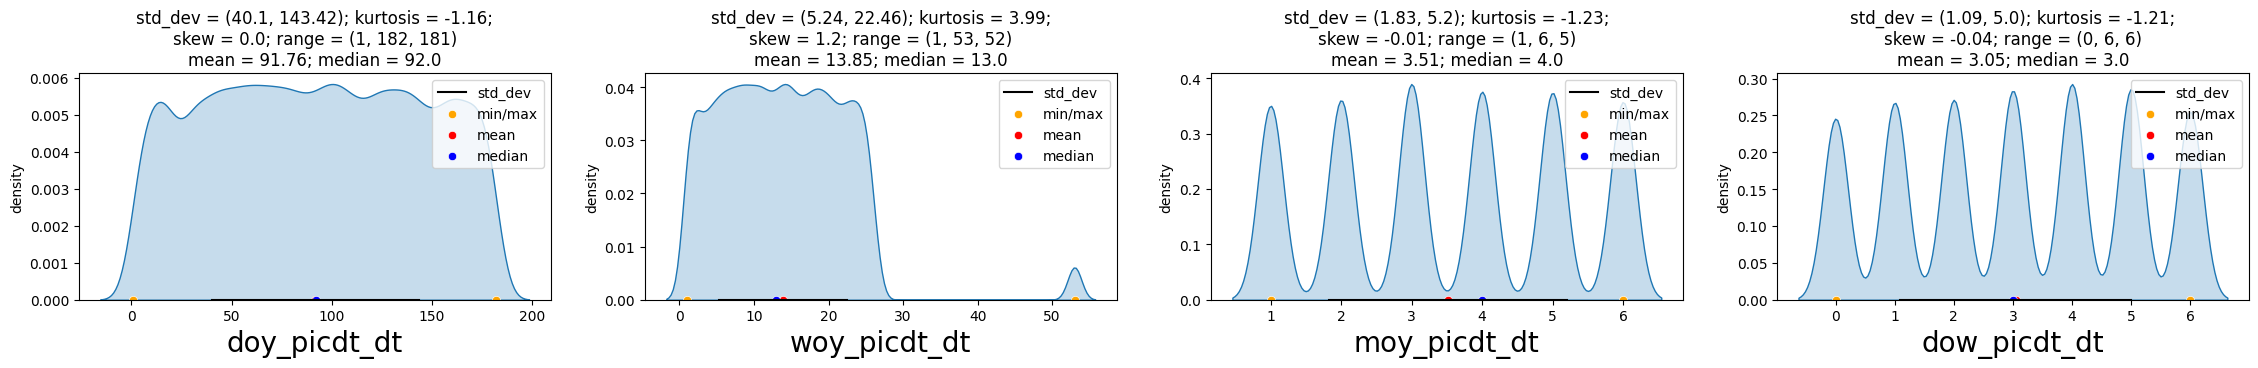

In [41]:
UVA_numeric(data,pickup_datetime)

**Summary**
* Occupation
  * Majority of people are self_employed.
  * There are extremely few Company Accounts. Might explain Outlier/Extreme values in credit/debit.

* Gender:
  *  Males accounts are 1.5 times in number than Female Accounts.

* customer_nw_category:
  *  Half of all the accounts belong to the 3rd net worth category.
  *  Less than 15% belong to the highest net worth category.

**Things to investigate further down:**
* Possibility: Company accounts are the reason behind the outlier transactions.
* Possibility: customers belonging to the highest net worth category may explain the skewness of the transactions.

### account_info

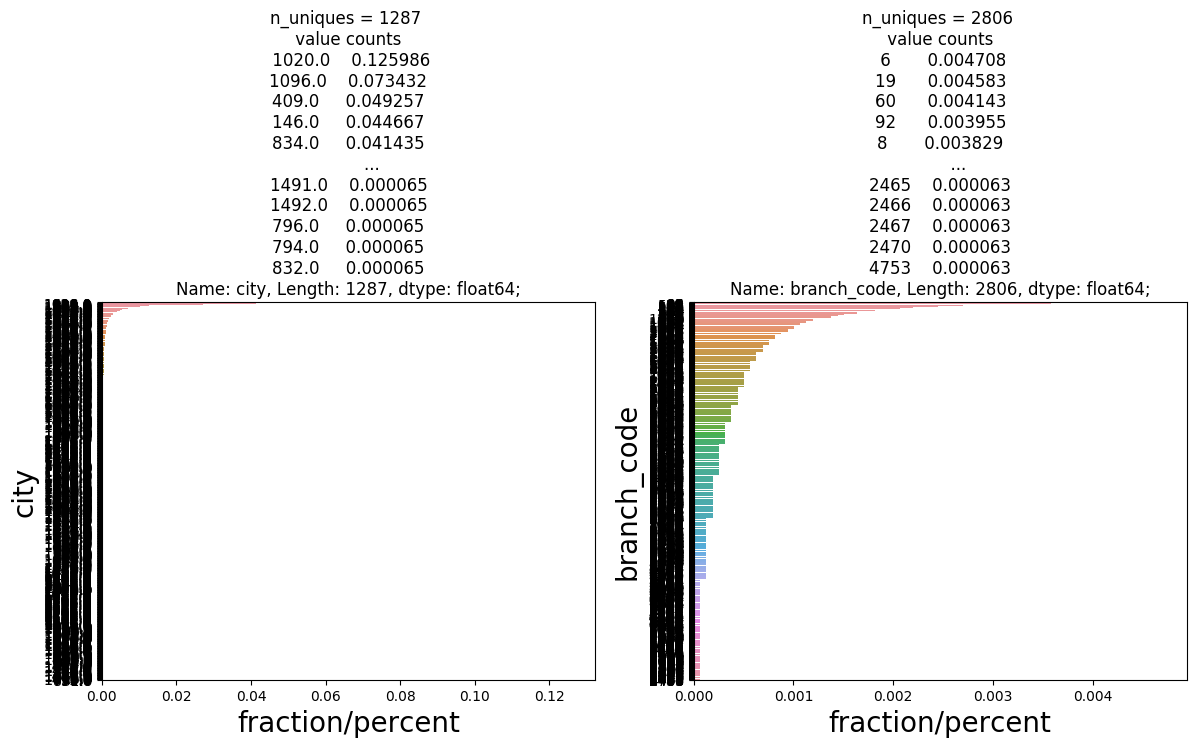

In [ ]:
UVA_category(data, ['city', 'branch_code'])

(0, 0.02)

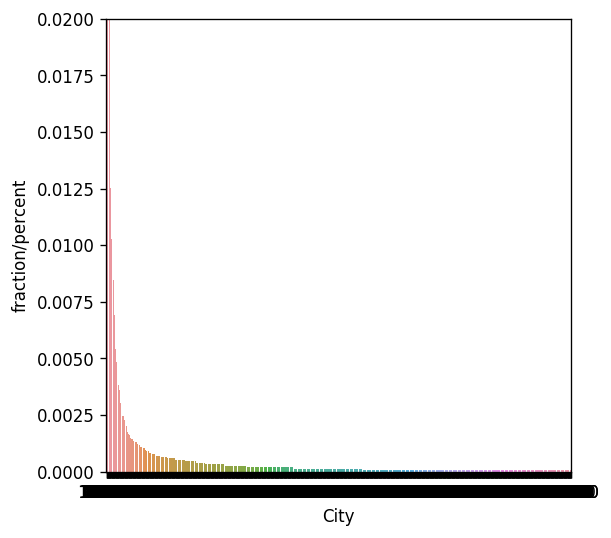

In [ ]:
#Plotting "city"
plt.figure(figsize = (5,5), dpi = 120)
city_count = data['city'].value_counts(normalize=True)
sns.barplot(city_count.index, city_count , order = city_count.index)
plt.xlabel('City')
plt.ylabel('fraction/percent')
plt.ylim(0,0.02)

Text(0, 0.5, 'fraction/percent')

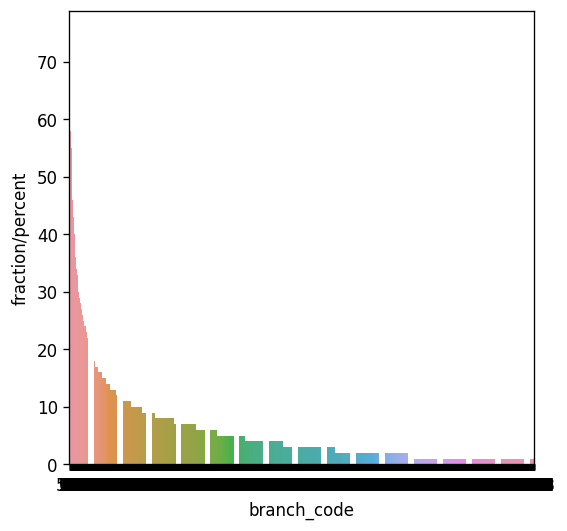

In [ ]:
#Plotting "branch_code"
plt.figure(figsize = (5,5), dpi = 120)
branch_count = data['branch_code'].value_counts()
sns.barplot(branch_count.index, branch_count , order = branch_count.index)
plt.xlabel('branch_code')
plt.ylabel('fraction/percent')
#plt.ylim(0,0.02)

**Summary:**
for both variable "city" and "branch_code", there are too many categories.

**Things to investigate further Down**
* Popular cities and branch code might be able to explain the skewness and outliers of credit/debit variables.
* Possibility that cities and branch code with very few accounts may lead to churning.

### churn

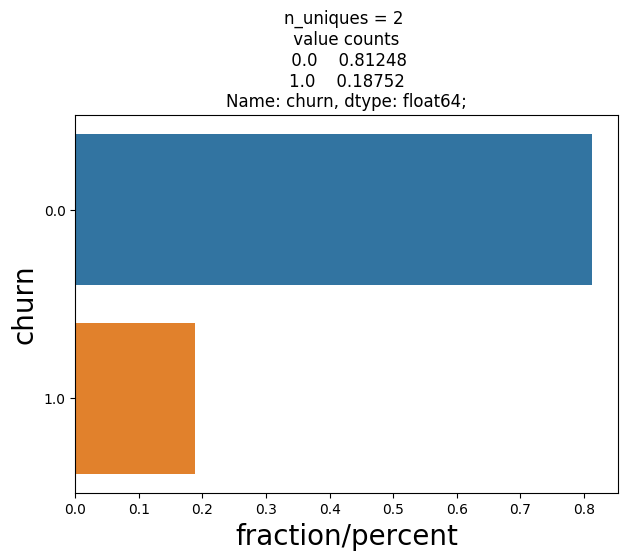

In [ ]:
UVA_category(data, ['churn'])

**Summary**
* Number of people who churned are 1/4 times of the people who did not churn in the given data.

In [ ]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             437
dependents                        2045
occupation                          67
city                               674
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

## Missing Values and Outliers